In [88]:
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [89]:
X = np.load("digit_data/X.npy")
y = np.load("digit_data/y.npy")
X = X[0:1000]
y = y[0:1000]
print(X.shape)
print(X[0])

(1000, 400)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

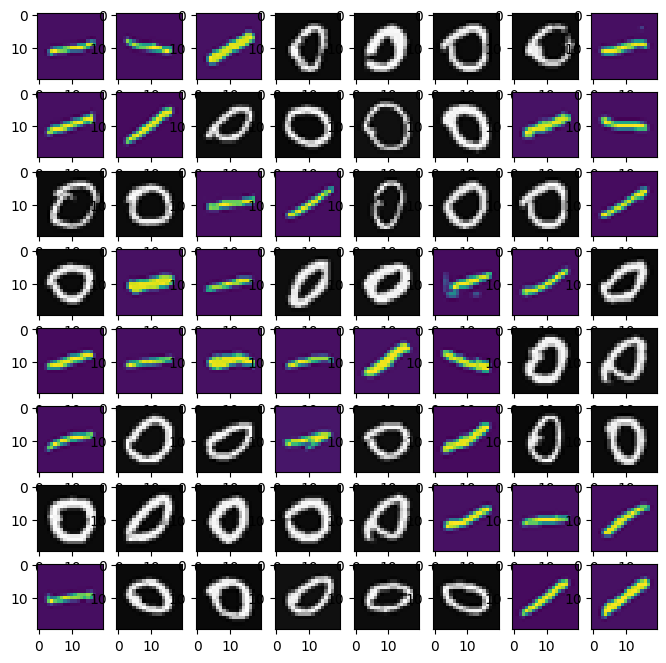

In [90]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        if y[r] == 1:
            ax[i][j].imshow(X[r].reshape(20,20))
        else:
            ax[i][j].imshow(X[r].reshape(20,20),cmap = 'gray')

# fig.show()
# want ones look like

In [91]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 100,activation = 'sigmoid'),
        Dense(units = 50,activation = 'sigmoid'),
        Dense(units = 10,activation = 'sigmoid'),
        Dense(units = 1,activation = 'sigmoid'),
    ],name = "my_model"
)


In [92]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               40100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 45,671
Trainable params: 45,671
Non-trainable params: 0
_________________________________________________________________


In [93]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(400, 100)
<tf.Variable 'dense_9/kernel:0' shape=(400, 100) dtype=float32, numpy=
array([[ 0.07149322, -0.04227223, -0.07647954, ...,  0.08903892,
        -0.05689171, -0.07201141],
       [-0.03362601, -0.05361   , -0.01547202, ...,  0.08544221,
        -0.08856843, -0.01171637],
       [-0.01332225,  0.10307156,  0.03403275, ...,  0.07195934,
         0.02405328,  0.02113029],
       ...,
       [-0.03200455,  0.07825785,  0.00301513, ...,  0.08614755,
        -0.02353527, -0.01026692],
       [-0.02127443,  0.06743004, -0.00747314, ..., -0.03002033,
        -0.00605287, -0.0709582 ],
       [-0.04279981, -0.04149219,  0.03525297, ...,  0.08528479,
         0.01361286,  0.10680168]], dtype=float32)>


In [94]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20


32/32 [==============================] - 1s 903us/step - loss: 0.6683
Epoch 2/20
32/32 [==============================] - 0s 1000us/step - loss: 0.4614
Epoch 3/20
32/32 [==============================] - 0s 968us/step - loss: 0.2753
Epoch 4/20
32/32 [==============================] - 0s 1000us/step - loss: 0.1976
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1599
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1360
Epoch 7/20
32/32 [==============================] - 0s 968us/step - loss: 0.1178
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1044
Epoch 9/20
32/32 [==============================] - 0s 935us/step - loss: 0.0934
Epoch 10/20
32/32 [==============================] - 0s 935us/step - loss: 0.0846
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0710
Epoch 13/20
32/32 [=========================

In [95]:
X.shape
# print(X[0])

(1000, 400)

In [96]:
def pre(num):
    return 1 if num[0][0]>0.5 else 0
print(pre(model.predict(X[0].reshape(1,400))))
print(pre(model.predict(X[500].reshape(1,400))))

1/1 [==============================] - 0s 50ms/step
0
1/1 [==============================] - 0s 14ms/step
1


1/1 [==============================] - 0s 13ms/step


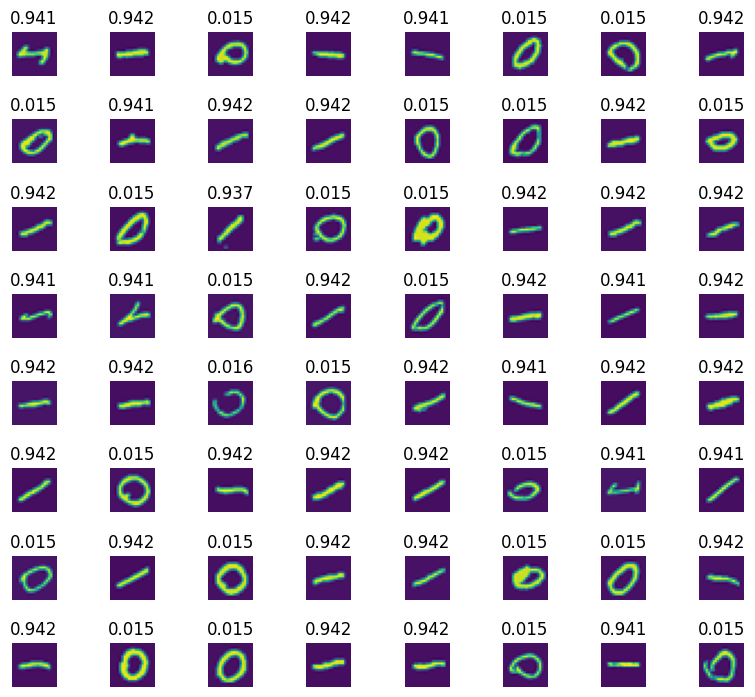

In [97]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]))
        ax[i][j].imshow(X[r].reshape(20,20))
        ax[i][j].set_axis_off()
        


In [98]:
layer1,layer2,layer3,layer4 = model.layers

per_w1,per_b1 = layer1.weights
per_w2,per_b2 = layer2.weights
per_w3,per_b3 = layer3.weights
per_w4,per_b4 = layer4.weights
W = [per_w1,per_w2,per_w3,per_w4]
B = [per_b1,per_b2,per_b3,per_b4]

In [99]:
per_b1.shape

TensorShape([100])

In [110]:
def my_layer(a_in,per_w,per_b):
    return tf.transpose(per_w)@tf.reshape(a_in,[1,-1]) + per_b
def predict_(a_in,W,B):
    for i in range(len(W)):
        a_in = my_layer(a_in,W[i],B[i])


In [111]:
# fig,ax = pl.subplots(8,8,figsize=(8,8))
# fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(8):
    for j in range(8):
        r = random.randint(1,1000)
        t_f = (model.predict(X[r].reshape(1,400))[0][0])
        m_f = predict_(tf.constant(X[r]),W,B)
        print("%.3f"%t_f,"== ? :","%.3f"%m_f)
        # ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]),)
        # ax[i][j].imshow(X[r].reshape(20,20))
        # ax[i][j].set_axis_off()
        

1/1 [==============================] - 0s 14ms/step


InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]